# # Book Recommend system

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/chalchitra-talks-book-recommendations/books.csv')

In [3]:
data.head()

,book_id,book_name,book_description_from_chalchitra,authors,publisher,publishedDate,pageCount,categories,averageRating,ratingsCount,language,description,synopsis
0,0,Charles Laughton: A Difficult Actor,This is the fullest biography yet on the actor...,['Simon Callow'],Fromm International,1997,318.0,['Biography & Autobiography'],NaN,NaN,en,NaN,NaN
1,1,Gone with the Wind,A historical novel by Margaret Mitchell.,['Margaret Mitchell'],Random House,2020-01-02,1072.0,['Fiction'],4.5,5.0,en,"'My dear, I don't give a damn.' Margaret Mitch...","'My dear, I don't give a damn.'\n\nMargaret Mi..."
2,2,Hayvadan,It is based on Kathasaritsagara and Thomas Man...,['Girish Karnad'],Radhakrishna Prakashan,2021-07-29,132.0,NaN,NaN,NaN,hi,NaN,NaN
3,3,The London Jungle Book,A visual travelogue by Bhajju Shyam,"['Bhajju Shyam', 'Sirish Rao', 'Gita Wolf-Samp...",Tara Publishing,2004,48.0,['Art'],5.0,1.0,en,"Bhajju Shyam, of the Gond tribe of central Ind...",“A beautiful book. I would like to give it to ...
4,4,The Private Life of Plants,This book reveals hidden events and phenomena ...,['David Attenborough'],NaN,1995,320.0,['Botany'],4.0,3.0,en,"Without plants, there would be no food, no ani...","Without plants, there would be no food, no ani..."


In [4]:
data.columns

Index(['book_id', 'book_name', 'book_description_from_chalchitra', 'authors',
       'publisher', 'publishedDate', 'pageCount', 'categories',
       'averageRating', 'ratingsCount', 'language', 'description', 'synopsis'],
      dtype='object')

In [5]:
data.isnull().sum()

book_id                               0
book_name                             0
book_description_from_chalchitra      0
authors                              11
publisher                            41
publishedDate                         8
pageCount                            29
categories                           25
averageRating                       107
ratingsCount                        107
language                              6
description                          38
synopsis                             32
dtype: int64

In [6]:
data.describe()

,book_id,pageCount,averageRating,ratingsCount
count,319.000000,290.000000,212.000000,212.000000
mean,159.000000,349.417241,3.849057,353.820755
std,92.231593,205.388808,0.705999,885.116136
min,0.000000,24.000000,1.000000,1.000000
25%,79.500000,220.250000,3.500000,4.000000
50%,159.000000,320.000000,4.000000,22.500000
75%,238.500000,432.000000,4.000000,116.000000
max,318.000000,1368.000000,5.000000,3972.000000


In [7]:
data['averageRating'].isnull().sum()

107

In [8]:
data['averageRating'] = data['averageRating'].fillna(0)

In [9]:
data['ratingsCount'] = data['ratingsCount'].fillna(0)

In [10]:
data.isnull().sum()

book_id                              0
book_name                            0
book_description_from_chalchitra     0
authors                             11
publisher                           41
publishedDate                        8
pageCount                           29
categories                          25
averageRating                        0
ratingsCount                         0
language                             6
description                         38
synopsis                            32
dtype: int64

In [11]:
data.describe()

,book_id,pageCount,averageRating,ratingsCount
count,319.000000,290.000000,319.000000,319.000000
mean,159.000000,349.417241,2.557994,235.141066
std,92.231593,205.388808,1.908832,740.147050
min,0.000000,24.000000,0.000000,0.000000
25%,79.500000,220.250000,0.000000,0.000000
50%,159.000000,320.000000,3.500000,4.000000
75%,238.500000,432.000000,4.000000,48.500000
max,318.000000,1368.000000,5.000000,3972.000000


In [12]:
data['ratingsCount'] = data['ratingsCount'].astype(int)

In [13]:
data['ratingsCount'].unique()

array([   0,    5,    1,    3,   48,  440,   31,   47,  330,   27, 1588,
       1140,   67,  105,    8, 1006,   69,   26,   18,  196,   29,    2,
         13, 2795,   78,   72,   10,   54,   49,   12, 3539,  262,    4,
        114, 1831,   24,   14,   37,  171,   23, 3591,  520,    9,   21,
       3211, 2230, 2838,   56,  950,   16,  122,  190,  227,   70,   80,
         91,  238, 3317,  124,  133,   35, 3307,   89,   33,    7,  104,
         17,  528,    6,   81, 3039,  151,  145,   36,   76, 3972,   15,
         34,   39,   79,  134,   46,  228,  221,   32,   61,   28, 2650,
       3476,  191, 2391,  319,  618,   45,   22,  590, 3388, 1484,  283,
         50, 3458,   41,  359, 1665,  102,  175,  508, 3898,   93])

In [14]:
top100 = data[data['ratingsCount'] > 100]

In [15]:
top = top100.sort_values(by='averageRating',ascending = False).head(10)

<AxesSubplot:xlabel='averageRating', ylabel='book_name'>

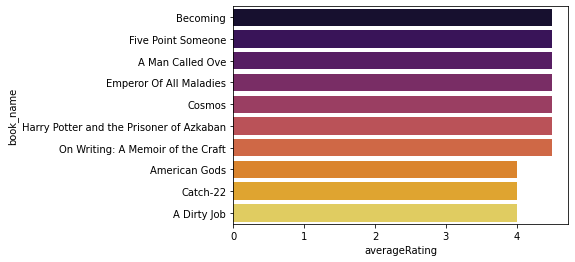

In [16]:
fig = plt.Figure(figsize=(15,9))
sns.barplot(x ='averageRating',y='book_name',data=top,palette = 'inferno')

In [17]:
topauthor = data.groupby('authors')['book_name'].count().reset_index().sort_values('book_name',ascending = False).head(10)

<AxesSubplot:xlabel='book_name', ylabel='authors'>

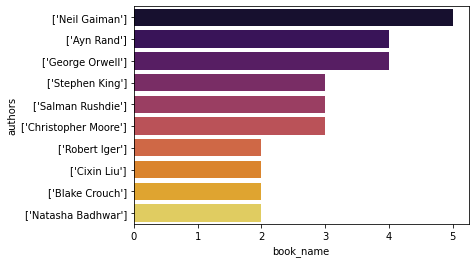

In [18]:
fig = plt.Figure(figsize=(16,8))
sns.barplot(x='book_name',y='authors',data=topauthor,palette = 'inferno')

In [19]:
data.averageRating = data.averageRating.astype(float)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Rating distription for all books')

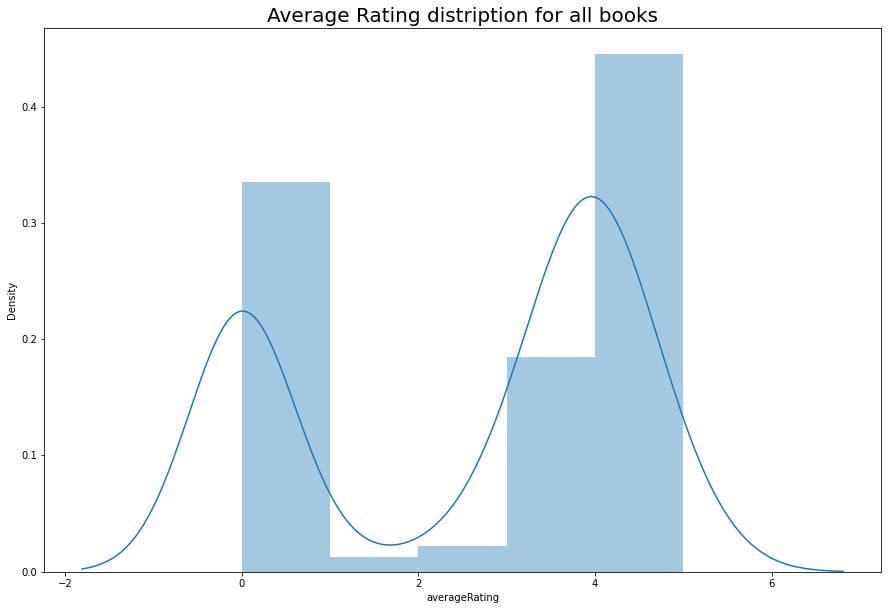

In [20]:
fig,ax = plt.subplots(figsize=(15,10))
sns.distplot(data['averageRating'],ax=ax)
ax.set_title('Average Rating distription for all books',fontsize=20)

Text(0.5, 1.0, 'Reletion between rating counts and avarage rating')

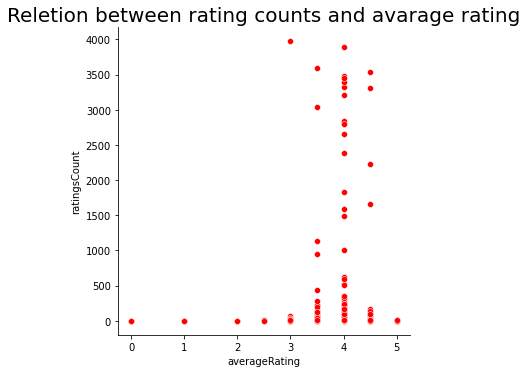

In [21]:
ax = sns.relplot(data=data,x = 'averageRating',y='ratingsCount',color ='red',marker = 'o')
plt.title('Reletion between rating counts and avarage rating',fontsize=20)

Text(0.5, 1.0, 'Reletion between avaragerating and pagecount')

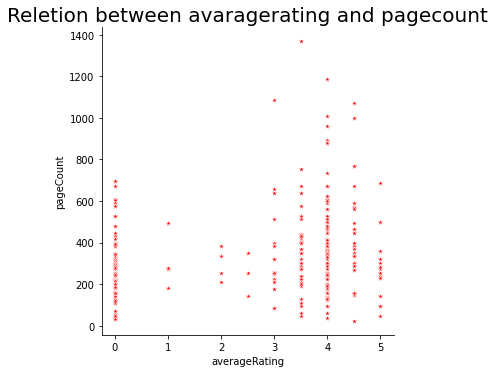

In [22]:
ax = sns.relplot(x = 'averageRating',y='pageCount',data=data,color='red',marker = '*')
plt.title('Reletion between avaragerating and pagecount',fontsize=20)

In [23]:
df = data.copy()

In [24]:
df

,book_id,book_name,book_description_from_chalchitra,authors,publisher,publishedDate,pageCount,categories,averageRating,ratingsCount,language,description,synopsis
0,0,Charles Laughton: A Difficult Actor,This is the fullest biography yet on the actor...,['Simon Callow'],Fromm International,1997,318.0,['Biography & Autobiography'],0.0,0,en,NaN,NaN
1,1,Gone with the Wind,A historical novel by Margaret Mitchell.,['Margaret Mitchell'],Random House,2020-01-02,1072.0,['Fiction'],4.5,5,en,"'My dear, I don't give a damn.' Margaret Mitch...","'My dear, I don't give a damn.'\n\nMargaret Mi..."
2,2,Hayvadan,It is based on Kathasaritsagara and Thomas Man...,['Girish Karnad'],Radhakrishna Prakashan,2021-07-29,132.0,NaN,0.0,0,hi,NaN,NaN
3,3,The London Jungle Book,A visual travelogue by Bhajju Shyam,"['Bhajju Shyam', 'Sirish Rao', 'Gita Wolf-Samp...",Tara Publishing,2004,48.0,['Art'],5.0,1,en,"Bhajju Shyam, of the Gond tribe of central Ind...",“A beautiful book. I would like to give it to ...
4,4,The Private Life of Plants,This book reveals hidden events and phenomena ...,['David Attenborough'],NaN,1995,320.0,['Botany'],4.0,3,en,"Without plants, there would be no food, no ani...","Without plants, there would be no food, no ani..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,314,Anathem,It is a science fiction novel by American writ...,['Neal Stephenson'],Harper Collins,2009-08-25,1008.0,['Fiction'],4.0,175,en,"For ten years Fraa Erasmas, a young avout, has...","For ten years Fraa Erasmas, a young avout, ha..."
315,315,Cloud Atlas,"It is a work combining metafiction, historical...",['David Mitchell'],Vintage Canada,2010-07-16,528.0,['Fiction'],4.0,508,en,By the New York Times bestselling author of Th...,By the New York Times bestselling author of Th...
316,316,Watchmen,It is an American comic book maxiseries by Ala...,"['Alan Moore', 'Dave Gibbons', 'John Higgins']",Dc Comics,1987,413.0,['Comics & Graphic Novels'],4.0,3898,en,As former members of a disbanded group of supe...,"""Following two generations of masked superhero..."
317,317,Matterhorn,An incredible publishing story written over th...,['Karl Marlantes'],"Grove/Atlantic, Inc.",2010-04-01,592.0,['Fiction'],4.5,93,en,"Intense, powerful, and compelling, Matterhorn ...","Intense, powerful, and compelling, Matterhorn ..."


In [25]:
df.loc[(df['averageRating'] >=0) & (df['averageRating'] >= 1),'rating between'] = 'between 0 and 1'
df.loc[(df['averageRating'] >=1) & (df['averageRating'] >= 2),'rating between'] = 'between 1 and 2'
df.loc[(df['averageRating'] >=2) & (df['averageRating'] >= 3),'rating between'] = 'between 2 and 3'
df.loc[(df['averageRating'] >=3) & (df['averageRating'] >= 4),'rating between'] = 'between 3 and 4'
df.loc[(df['averageRating'] >=4) & (df['averageRating'] >= 5),'rating between'] = 'between 4 and 5'

In [26]:
rating_df = pd.get_dummies(df['rating between'])
rating_df

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
314,0,0,0,1,0
315,0,0,0,1,0
316,0,0,0,1,0
317,0,0,0,1,0


In [27]:
language_df = pd.get_dummies(df['language'])
language_df

,en,hi,sv
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
314,1,0,0
315,1,0,0
316,1,0,0
317,1,0,0


In [28]:
features = pd.concat([rating_df,language_df,df['averageRating'],df['ratingsCount']],axis=1)

In [29]:
features

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,en,hi,sv,averageRating,ratingsCount
0,0,0,0,0,0,1,0,0,0.0,0
1,0,0,0,1,0,1,0,0,4.5,5
2,0,0,0,0,0,0,1,0,0.0,0
3,0,0,0,0,1,1,0,0,5.0,1
4,0,0,0,1,0,1,0,0,4.0,3
...,...,...,...,...,...,...,...,...,...,...
314,0,0,0,1,0,1,0,0,4.0,175
315,0,0,0,1,0,1,0,0,4.0,508
316,0,0,0,1,0,1,0,0,4.0,3898
317,0,0,0,1,0,1,0,0,4.5,93


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
minmax = MinMaxScaler()

In [32]:
features = minmax.fit_transform(features)

In [33]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.9       ,
        0.00125881],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.8       ,
        0.98136959],
       [0.        , 0.        , 0.        , ..., 0.        , 0.9       ,
        0.0234139 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.9       ,
        0.00125881]])

In [34]:
from sklearn import neighbors

In [35]:
model = neighbors.NearestNeighbors( n_neighbors=5,algorithm = 'ball_tree')
model.fit(features)
dist,idlist = model.kneighbors(features)

In [36]:
def bookrecommender(book_name):
    book_list_name=[]
    book_id = df[df['book_name'] == book_name].index
    book_id = book_id[0]
    
    for newid in idlist[book_id]:
        book_list_name.append(df.loc[newid].book_name)
    return book_list_name
    

# prediction

In [37]:
bookrecommender('Hayvadan')

['Tarkash',
 'Teen Ekant',
 'Hayvadan',
 'Tumhare Baarien Mein',
 'Lava by Suresh Vashishth']